<a href="https://colab.research.google.com/github/diptomondal007/Ai-Assignment/blob/main/house_rent_prediction_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
uploaded = files.upload()

Saving RentRaw.csv to RentRaw.csv


In [101]:
for f in uploaded.keys():
  data_frame = pd.read_csv(f, index_col=0, low_memory=False)

In [102]:
data_frame.head()

,BuiltUpSize,City,CreatedDateTime,CreatedUser,DataSourceID,Furnishing,Latitude,Longitude,NoOfBathroom,NoOfBedroom,NoOfParking,Postcode,PostedDate,PropertyAddress,PropertyName,PropertyType,RentalPerMth,SourceUrl,State,UpdatedDateTime,UpdatedUser
ID,,,,,,,,,,,,,,,,,,,,,
1,1000,Bandar Utama,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.14195,101.616,2,3,1,47400,2018-07-30 00:00:00,Jalan Masjid,Pelangi Utama,Condominium,2200,https://www.iproperty.com.my/property/bandar-u...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
2,1000,Bandar Utama,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.14195,101.616,2,3,1,47400,2018-07-30 00:00:00,Jalan Masjid,Pelangi Utama,Condominium,2200,https://www.iproperty.com.my/property/bandar-u...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
3,1057,Petaling Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.12252,101.628,2,3,1,47300,2018-07-30 00:00:00,Jalan SS 2/72,Ken Damansara 3,Condominium,1980,https://www.iproperty.com.my/property/petaling...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
4,1057,Petaling Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.12252,101.628,2,3,1,47300,2018-07-30 00:00:00,Jalan SS 2/72,Ken Damansara 3,Condominium,1980,https://www.iproperty.com.my/property/petaling...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
5,0,Bandar Sunway,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.05930,101.616,2,2,0,47100,2018-07-30 00:00:00,Jalan Taylors,D' Latour,Condominium,2600,https://www.iproperty.com.my/property/bandar-s...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r


In [103]:
data_frame.isnull().sum()

BuiltUpSize         0
City               14
CreatedDateTime     0
CreatedUser         0
DataSourceID        0
Furnishing          0
Latitude            0
Longitude           0
NoOfBathroom        0
NoOfBedroom         0
NoOfParking         0
Postcode            0
PostedDate          0
PropertyAddress    51
PropertyName        0
PropertyType        0
RentalPerMth        0
SourceUrl           0
State               0
UpdatedDateTime     0
UpdatedUser         0
dtype: int64

In [104]:
data_frame.describe()

,BuiltUpSize,DataSourceID,Latitude,Longitude,NoOfBathroom,NoOfBedroom,NoOfParking,RentalPerMth
count,54405.000000,54405.000000,54405.000000,54405.000000,54405.000000,54405.000000,54405.000000,5.440500e+04
mean,1307.539381,22.776804,0.001914,0.063496,2.276078,1.716938,1.110339,4.078712e+03
std,946.439842,2.686957,0.076573,2.539170,1.183571,1.469507,1.057207,6.395336e+04
min,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000e+01
25%,825.000000,21.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.500000e+03
50%,1057.000000,23.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000e+03
75%,1426.000000,24.000000,0.000000,0.000000,3.000000,3.000000,2.000000,3.000000e+03
max,23649.000000,26.000000,3.141950,101.655000,20.000000,15.000000,30.000000,8.800000e+06


In [105]:
data_frame = data_frame.dropna()

In [106]:
data_frame = data_frame.reset_index(drop=True)

In [107]:
data_frame.isnull().sum()

BuiltUpSize        0
City               0
CreatedDateTime    0
CreatedUser        0
DataSourceID       0
Furnishing         0
Latitude           0
Longitude          0
NoOfBathroom       0
NoOfBedroom        0
NoOfParking        0
Postcode           0
PostedDate         0
PropertyAddress    0
PropertyName       0
PropertyType       0
RentalPerMth       0
SourceUrl          0
State              0
UpdatedDateTime    0
UpdatedUser        0
dtype: int64

In [108]:
print("There are {} duplicated values.".format(data_frame.duplicated().sum()))
data_frame[data_frame.duplicated(keep=False)].head()

There are 25229 duplicated values.


,BuiltUpSize,City,CreatedDateTime,CreatedUser,DataSourceID,Furnishing,Latitude,Longitude,NoOfBathroom,NoOfBedroom,NoOfParking,Postcode,PostedDate,PropertyAddress,PropertyName,PropertyType,RentalPerMth,SourceUrl,State,UpdatedDateTime,UpdatedUser
0,1000,Bandar Utama,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.14195,101.616,2,3,1,47400,2018-07-30 00:00:00,Jalan Masjid,Pelangi Utama,Condominium,2200,https://www.iproperty.com.my/property/bandar-u...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
1,1000,Bandar Utama,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.14195,101.616,2,3,1,47400,2018-07-30 00:00:00,Jalan Masjid,Pelangi Utama,Condominium,2200,https://www.iproperty.com.my/property/bandar-u...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
2,1057,Petaling Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.12252,101.628,2,3,1,47300,2018-07-30 00:00:00,Jalan SS 2/72,Ken Damansara 3,Condominium,1980,https://www.iproperty.com.my/property/petaling...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
3,1057,Petaling Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.12252,101.628,2,3,1,47300,2018-07-30 00:00:00,Jalan SS 2/72,Ken Damansara 3,Condominium,1980,https://www.iproperty.com.my/property/petaling...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
4,0,Bandar Sunway,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.05930,101.616,2,2,0,47100,2018-07-30 00:00:00,Jalan Taylors,D' Latour,Condominium,2600,https://www.iproperty.com.my/property/bandar-s...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r


In [109]:
data_frame = data_frame.drop_duplicates()
data_frame = data_frame.reset_index(drop=True)

In [110]:
data_frame = data_frame[["BuiltUpSize", "NoOfBathroom", "NoOfBedroom", "NoOfParking", "State", "Furnishing", "PropertyType", "RentalPerMth"]]
data_frame.head()

,BuiltUpSize,NoOfBathroom,NoOfBedroom,NoOfParking,State,Furnishing,PropertyType,RentalPerMth
0,1000,2,3,1,Selangor,Fully Furnished,Condominium,2200
1,1057,2,3,1,Selangor,Fully Furnished,Condominium,1980
2,0,2,2,0,Selangor,Fully Furnished,Condominium,2600
3,0,1,1,2,Selangor,Fully Furnished,Serviced Residence,1800
4,1248,3,0,2,Selangor,Partly Furnished,Condominium,1700


In [111]:
data_frame["State"].value_counts()

selangor        16206
kuala-lumpur     7237
johor            5514
putrajaya         134
Selangor           20
Name: State, dtype: int64

In [112]:
data_frame["State"] = data_frame["State"].replace("Selangor", "selangor")

In [113]:
data_frame["State"].value_counts()

selangor        16226
kuala-lumpur     7237
johor            5514
putrajaya         134
Name: State, dtype: int64

In [114]:
data_frame["Furnishing"].value_counts()

Fully Furnished     15553
Partly Furnished     9319
Unfurnished          4192
Unknown                47
Name: Furnishing, dtype: int64

In [115]:
data_frame = data_frame[data_frame["Furnishing"] != "Unknown"].reset_index(drop=True)

In [117]:
data_frame["Furnishing"].value_counts()

Fully Furnished     15553
Partly Furnished     9319
Unfurnished          4192
Name: Furnishing, dtype: int64

In [120]:
data_frame = data_frame[data_frame["BuiltUpSize"] != 0].reset_index(drop=True)

data_frame = data_frame[data_frame["NoOfBedroom"] != 0].reset_index(drop=True)

data_frame = data_frame[data_frame["NoOfBathroom"] != 0].reset_index(drop=True)

data_frame = data_frame[data_frame["NoOfParking"] != 0].reset_index(drop=True)

data_frame = data_frame[data_frame["RentalPerMth"] != 0].reset_index(drop=True)

In [125]:
with pd.option_context('float_format', '{:f}'.format): print(data_frame["RentalPerMth"].describe())

count     13086.000000
mean       2879.990601
std       21623.624529
min         110.000000
25%        1400.000000
50%        1800.000000
75%        2500.000000
max     1240000.000000
Name: RentalPerMth, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


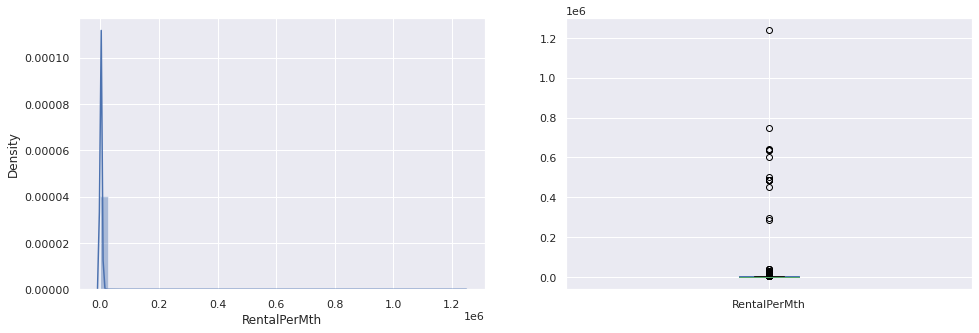

In [128]:
plt.subplot(121)
sns.distplot(data_frame["RentalPerMth"]);

plt.subplot(122)
data_frame["RentalPerMth"].plot.box(figsize=(16,5))

plt.show()

# Removing outlier values

In [132]:
data_frame = data_frame[data_frame["RentalPerMth"] <= 10000].reset_index(drop=True)

In [134]:
with pd.option_context('float_format', '{:f}'.format): print(data_frame["RentalPerMth"].describe())

count   13016.000000
mean     2090.654348
std      1072.684678
min       110.000000
25%      1400.000000
50%      1800.000000
75%      2500.000000
max     10000.000000
Name: RentalPerMth, dtype: float64


In [136]:
data_frame.head()

,BuiltUpSize,NoOfBathroom,NoOfBedroom,NoOfParking,State,Furnishing,PropertyType,RentalPerMth
0,1000,2,3,1,selangor,Fully Furnished,Condominium,2200
1,1057,2,3,1,selangor,Fully Furnished,Condominium,1980
2,1488,3,3,3,selangor,Partly Furnished,Condominium,4500
3,871,2,2,2,selangor,Fully Furnished,Condominium,2500
4,700,1,1,1,selangor,Partly Furnished,Condominium,1300


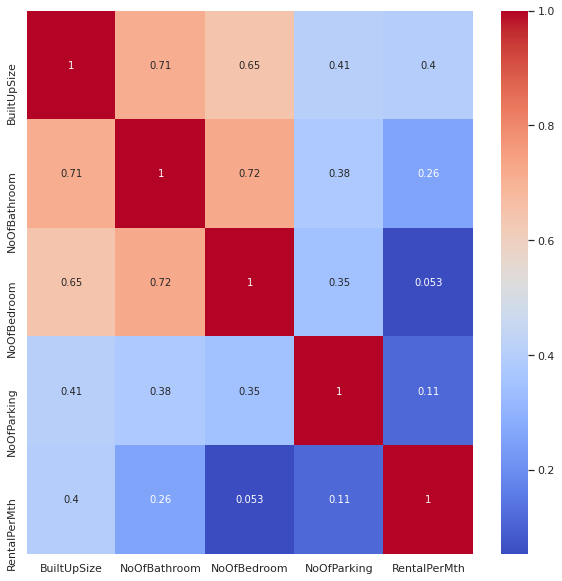

In [140]:
corr = data_frame.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [142]:
data_frame_with_dummy = pd.get_dummies(data_frame)
data_frame_with_dummy.head()

,BuiltUpSize,NoOfBathroom,NoOfBedroom,NoOfParking,RentalPerMth,State_johor,State_kuala-lumpur,State_putrajaya,State_selangor,Furnishing_Fully Furnished,Furnishing_Partly Furnished,Furnishing_Unfurnished,PropertyType_1-sty Terrace/Link House,PropertyType_1.5-sty Terrace/Link House,PropertyType_2-sty Terrace/Link House,PropertyType_2.5-sty Terrace/Link House,PropertyType_3-sty Terrace/Link House,PropertyType_4-sty Terrace/Link House,PropertyType_Apartment,PropertyType_Bungalow,PropertyType_Cluster House,PropertyType_Condominium,PropertyType_Flat,PropertyType_Residential Land,PropertyType_Semi-detached House,PropertyType_Serviced Residence,PropertyType_Townhouse
0,1000,2,3,1,2200,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1057,2,3,1,1980,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1488,3,3,3,4500,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,871,2,2,2,2500,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,700,1,1,1,1300,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [144]:
X = data_frame_with_dummy.drop(columns=["RentalPerMth"])
Y = data_frame_with_dummy["RentalPerMth"]

**Train Test split**

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

**Regression**

In [148]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
y_pred = regressor.predict(X_test)

In [153]:
regressor.score(X_test, y_test)

0.4251289757122978